In [1]:
using Pkg
Pkg.activate("@__DIR__")
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.12897177983538477, 0.6863866635957644, 0.9452279486233184, 0.6135953031731222, 0.7393683025755258, 0.49776424409145725, 0.6193417397007426, 0.363826187287986, 0.7584295856669816, 0.2184451048446261], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.4479438784027816, 0.23004681363952995, 0.021532597906190776, 0.8482825697641306, 0.10773487816863903, 0.32189982199036116, 0.9651330791713363, 0.18080927897651633, 0.2907506630258835, 0.36872799387588473], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.112262181144075

### 2. Apply ROSE

#### Using Imbalance Only

In [3]:
Xover, yover = rose(X, y; s = 0.3, ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
  class:  2


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.39655214890480683, 0.9396754225243799, -0.049007119359584614, 0.23761577805117567, 0.9597593708399546, 1.1221897321115193, 0.49724615998461863, 0.5331434630799519, 0.6050388851714472, 0.89680282946473], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.26646948980575014, 0.03621058216998667, 0.7309860878761503, 0.6018467812216749, 0.6703013669878127, -0.00542769832787204, 0.3312401924522786, 0.06870010833849358, 0.03259512157847594, 0.015737201860684565], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.11226218114

#### Using MLJ

In [4]:
rose_model = Imbalance.MLJ.ROSE(s=0.09, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(rose_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.50158946366594, 0.9435621907936368, 0.018045889274158514, 0.25341610576173806, 0.9153865956400172, 0.9983164836697787, 0.49760881885940567, 0.5408468357685118, 0.5624154623959604, 0.9307004128757419], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.2908496229009141, 0.02593599318532954, 0.7007185699376343, 0.5791194192523584, 0.7017266766530272, 0.01344450903597193, 0.3247019331289364, 0.034444502602006016, 0.02361300657400072, 0.019793979092538914], Column3 = [0.061489791166806085, 0.45645058368583713, 0.06546916714160167, 0.7243956502957003, 0.6566078046100849, 0.6612680221549533, 0.11226218114407

#### Using TableTransforms

In [8]:
using Imbalance: TableTransforms.ROSE
rose_model_t = ROSE(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
apply(rose_model_t, Xy)

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:00



Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  class:  2.0


((Column1 = [0.10083458248601018, 0.32106572972106817, 0.9695150609084499, 0.012898301755861596, 0.7555027304121053, 0.3467415729179013, 0.35969402837473463, 0.2601876747805505, 0.9153753178220317, 0.907410564584128  …  0.04642776636769619, 0.9267195282935231, -0.27251714813872835, 0.18494801901596775, 1.1076686215064122, 1.5351005602506544, 0.4960372970686619, 0.5074655541180852, 0.7471169610897366, 0.7838108847613572], Column2 = [0.3895982138874483, 0.08174960438833156, 0.6636644264313925, 0.7304405732047541, 0.027800141050299598, 0.20874452928568255, 0.5612819555303167, 0.5693791212655085, 0.2787942224536374, 0.5598733934174821  …  0.1852023794885368, 0.07045921211884375, 0.8318778143378704, 0.6776046544527299, 0.5655503347704312, -0.06833505620735196, 0.35303439019675265, 0.18288546079345216, 0.06253550492672666, 0.002214611087836736], Column3 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0], Column4 = [0.061489791166806085, 

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/Manifest.toml`


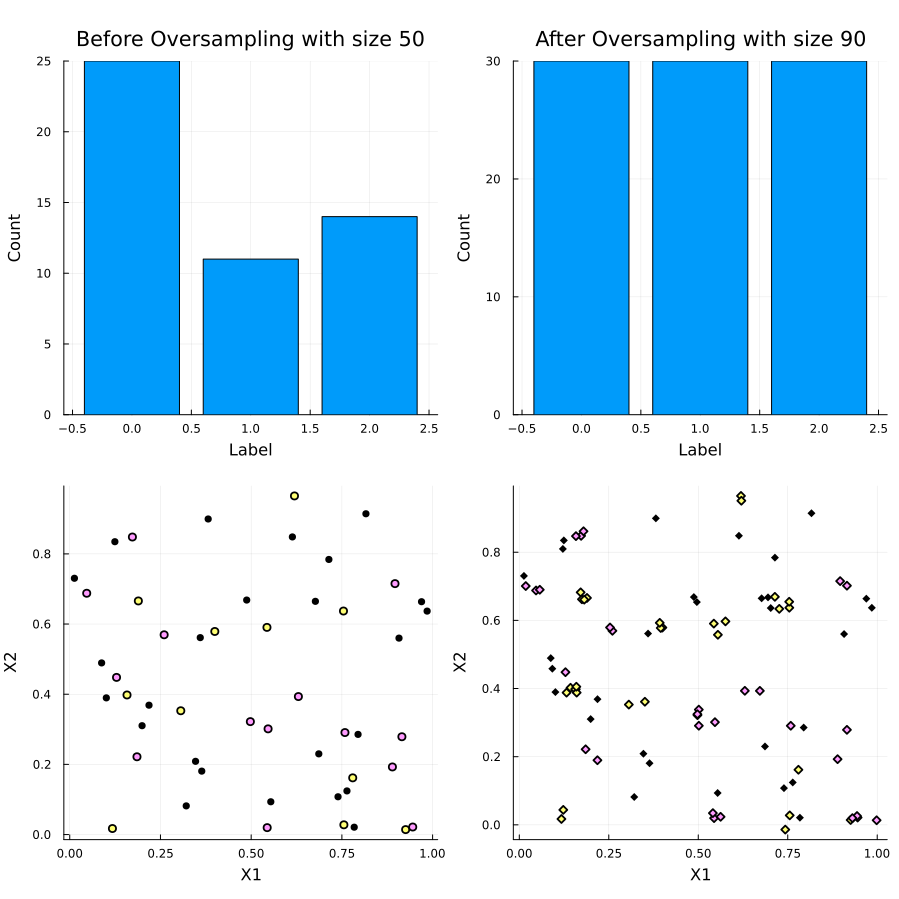

In [9]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)